<a href="https://colab.research.google.com/github/Molly-Abisage/N.H-HYPOTHYROID/blob/main/WEEK_8_IP_THYROID_MollyAbisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI HOSPITAL HYPOTHYROIDISM TEST


**OVERVIEW**

Nairobi hospital conducted a clinical camp to test for hypothyroidism amondst thyroid patients. we are using this data to accomplish the following

build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

part 1: build decision trees

part 2: SVM

**QUESTION DEFINITION**

predict if the symptoms of a patient indicates that the patient has hypothyroid.

**METRICS OF SUCCESS**

We are diagnosing if the variables we have indicate that the patient has hypothyroidism. a high accuracy is what we expect , not so accurate model means wrong diagnosing and would give rise to wrong medication which can cost lifes.

**CONTEXT**
column description

status - tells us if the patient is negative or has hypothyroidism

age - how old is the patient

sex - if the patient is male or female

on_thyroxine - True /False

query_on_thyroxine

on_antithyroid_medication - if the patient is on medication

thyroid_surgery - if the patient has had thyroid surgery

query_hypothyroid

query_hyperthyroid

pregnant - if the patient is pregnant,true or false

sick - if the patient is sick,

tumor - if the patient has tumor

lithium

goitre - if the patient has goitre

TSH_measured - if a blood test has been done to measure the hormone

TSH - thyroid stimulating hormone , tells the thyroid to release thyroid hormone to the blood.

T3_measured - if T3 measurement has been done

T3 - triiodothyronine , this is a thyroid hormone produced in the thyroid glands

TT4_measured

TT4 - thyroxine , the principla hormone from the thyroid gland.

T4U_measured - true / false

T4U - thyroid hormone produced in the thyroid glands(thyroxine)/levothyroxine

FTI_measured - if FTI has been measured

FTI - free thyroxine index, it is considered more indicator of thyroid, obtained by nultiplying Total T4 and T3 uptake.

TBG_measured - if TBG has been measured.

TBG - thyroid binding globulin, binds thyroid hormones in circulation

**EXPERIMENTAL DESIGN**

Recording the Experimental Design;-  
Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

Load data and preview preliminary characteristics
Data Cleaning (check for and deal with outliers, anomalies and missing data)
Exploratory Analysis
Implementing the Solution
Challenging the Solution
Follow Up Questions

# LOAD AND TIDYING THE DATASET

In [253]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [254]:
hypothy = pd.read_csv('/content/hypothyroid.csv')
# previewing a sample of the data

hypothy.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
400,negative,34,F,f,f,f,f,f,f,f,f,f,f,t,y,0,y,6.60,y,241,y,0.98,y,246,n,?
3015,negative,70,M,f,f,f,f,f,f,f,f,f,f,f,y,0.20,y,2,y,116,y,0.82,y,152,n,?
805,negative,45,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,2.10,y,166,y,0.88,y,189,n,?
836,negative,65,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.90,y,134,y,0.98,y,137,n,?
2188,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.40,y,126,y,0.89,y,141,n,?


In [255]:
#preview the head
hypothy.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [256]:
# checking the total number of records and columns

hypothy.shape

(3163, 26)

In [257]:
# checking datatypes of each attribute and previewing the existense of null values

hypothy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

the columns have 'object' as datatype, we change this in cleaning stage

In [258]:
# checking for unique values in each column

hypothy.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [259]:
#we preview the unique features in each column

# previewing the unique values of each of our columns

columns = hypothy.columns.to_list()

for column in columns:
    print("\n")
    print("Column Name:", column)
    print(hypothy[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

In [260]:
#check for null values
hypothy.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

there are no missinng values in the dataset

In [261]:
#the dataset has columns with '?' on the records, lets check the total number of '?' on the columns

print(hypothy[hypothy == '?'].count())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


age = 446   
TSH = 468  
T3 = 695   
TBG = 2,903
TBG has 75% of the records in the column being '?' therefore we drop this column since its computation wil bring about errors.
 The other records are assumed to be null and we can drop them also or replace them.

In [262]:
#Dropping columns TBG and TBG_measured since they dont have valuable records to work with

hypothy.drop(['TBG', 'TBG_measured'],axis=1, inplace=True)

In [263]:
# confirming that TBG has been dropped
hypothy.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [264]:
#lets check for duplicates

hypothy.duplicated().value_counts()


False    3011
True      152
dtype: int64

In [265]:
#dropping the duplicate rows
hypothy.drop_duplicates(inplace = True)

In [266]:
#checking if the duplicates have been dropped
hypothy.duplicated().sum()

0

In [267]:
# let's start by converting categorical variables to category

hypothy['status'] = hypothy['status'].astype('category')
hypothy['sex'] = hypothy['sex'].astype('category')
hypothy['on_thyroxine'] = hypothy['on_thyroxine'].astype('category')
hypothy['query_on_thyroxine'] = hypothy['query_on_thyroxine'].astype('category')
hypothy['on_antithyroid_medication'] = hypothy['on_antithyroid_medication'].astype('category')
hypothy['thyroid_surgery'] = hypothy['thyroid_surgery'].astype('category')
hypothy['query_hypothyroid'] = hypothy['query_hypothyroid'].astype('category')

hypothy['query_hyperthyroid'] = hypothy['query_hyperthyroid'].astype('category')
hypothy['pregnant'] = hypothy['pregnant'].astype('category')
hypothy['sick'] = hypothy['sick'].astype('category')
hypothy['tumor'] = hypothy['tumor'].astype('category')
hypothy['lithium'] = hypothy['lithium'].astype('category')
hypothy['goitre'] = hypothy['goitre'].astype('category')
hypothy['TSH_measured'] = hypothy['TSH_measured'].astype('category')

hypothy['T3_measured'] = hypothy['T3_measured'].astype('category')
hypothy['TT4_measured'] = hypothy['TT4_measured'].astype('category')
hypothy['T4U_measured'] = hypothy['T4U_measured'].astype('category')
hypothy['FTI_measured'] = hypothy['FTI_measured'].astype('category')

In [268]:
#cinfirm

hypothy.dtypes

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
dtype: object

In [269]:
# first converting categorical variables to category

hypothy['status'] = hypothy['status'].astype('category')
hypothy['sex'] = hypothy['sex'].astype('category')
hypothy['on_thyroxine'] = hypothy['on_thyroxine'].astype('category')
hypothy['query_on_thyroxine'] = hypothy['query_on_thyroxine'].astype('category')
hypothy['on_antithyroid_medication'] = hypothy['on_antithyroid_medication'].astype('category')
hypothy['thyroid_surgery'] = hypothy['thyroid_surgery'].astype('category')
hypothy['query_hypothyroid'] = hypothy['query_hypothyroid'].astype('category')

hypothy['query_hyperthyroid'] = hypothy['query_hyperthyroid'].astype('category')
hypothy['pregnant'] = hypothy['pregnant'].astype('category')
hypothy['sick'] = hypothy['sick'].astype('category')
hypothy['tumor'] = hypothy['tumor'].astype('category')
hypothy['lithium'] = hypothy['lithium'].astype('category')
hypothy['goitre'] = hypothy['goitre'].astype('category')
hypothy['TSH_measured'] = hypothy['TSH_measured'].astype('category')

hypothy['T3_measured'] = hypothy['T3_measured'].astype('category')
hypothy['TT4_measured'] = hypothy['TT4_measured'].astype('category')
hypothy['T4U_measured'] = hypothy['T4U_measured'].astype('category')
hypothy['FTI_measured'] = hypothy['FTI_measured'].astype('category')

hypothy.dtypes

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
dtype: object

In [270]:
# let's convert numerical variables to numerical datatypes and replace question marks nan
##‘coerce’ converts invalid parsing in this case '?' to NaN.

hypothy['age'] = pd.to_numeric(hypothy['age'], errors = 'coerce') 
hypothy['TSH'] = pd.to_numeric(hypothy['TSH'], errors = 'coerce')
hypothy['T3'] = pd.to_numeric(hypothy['T3'], errors = 'coerce')
hypothy['TT4'] = pd.to_numeric(hypothy['TT4'], errors = 'coerce')
hypothy['T4U'] = pd.to_numeric(hypothy['T4U'], errors = 'coerce')
hypothy['FTI'] = pd.to_numeric(hypothy['FTI'], errors = 'coerce')

print(hypothy.dtypes)

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object


In [271]:
hypothy.shape

(3011, 24)

# EXPLORATORY DATA ANALYSIS

**UNIVARIATE ANALYSIS**

In [272]:
#lets preview our clean dataset

df1 = hypothy
df1.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [273]:
# checking the statistical summary of the cleaned data
df1.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2584.000000,2631.000000,2406.000000,2846.000000,2847.000000,2848.000000
mean,51.361068,5.809320,1.933666,108.706922,0.977559,115.489080
std,19.288226,24.023192,0.979488,44.606704,0.225796,60.147649
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.200000,2.300000,127.000000,1.060000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


negative       2870
hypothyroid     141
Name: status, dtype: int64


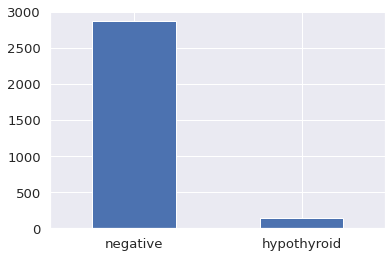

In [274]:
#counting the number of people who have tested negative and those who are hypothyroid.
df1.status.value_counts().plot(kind = 'bar', rot = 0)
print(df1.status.value_counts())

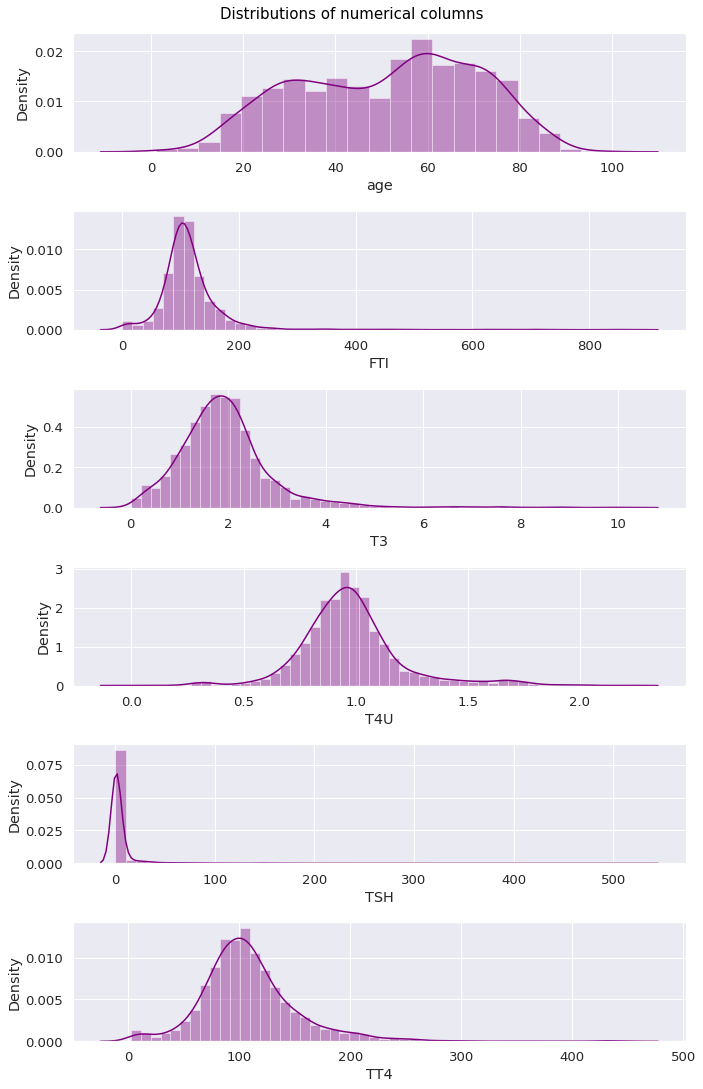

In [275]:
#lets check the distribution of numerical columns
dist_columns = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df1, dist_columns):
 sns.distplot(df1[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

comments:  age shows a bimodal distribution
FTI and T3 shoes a bit or more than trimodal distribution with a thin curve and some skewness to the right
T4U is a shows some bimodal distribution with majority of the data being normally distributed
TSH is heavily skewed to the right
TT4 is normally distributed

**BIVARIATE ANALYSIS**

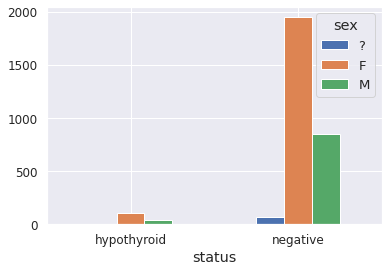

In [276]:
#barchart comparing sex and status
pd.crosstab(df1['status'], df1['sex']).plot(kind='bar', rot=0, fontsize=12)

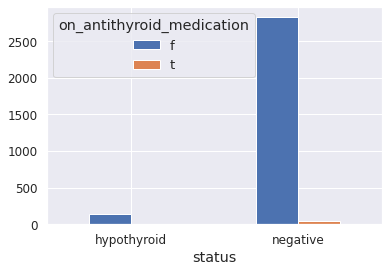

In [277]:
pd.crosstab(df1['status'], df1['on_antithyroid_medication']).plot(kind='bar', rot=0, fontsize=12)
# a few males who test negative are on antithyroid medication

In [278]:
# splitting age into  age groups to get a deeper understanding of our data.
conditions = [
    ((df1.age >= 0) & (df1.age <= 9)),
    ((df1.age >= 10) & (df1.age <= 19)),
    ((df1.age >= 20) & (df1.age <= 29)),
    ((df1.age >= 30) & (df1.age <= 39)),
    ((df1.age >= 40) & (df1.age <= 49)),
    ((df1.age >= 50) & (df1.age <= 59)),
    ((df1.age >= 60) & (df1.age <= 69)),
    ((df1.age >= 70) & (df1.age <= 79)),
    ((df1.age >= 80) & (df1.age <= 89)),
    ((df1.age >= 90) & (df1.age <= 98))
]

groups = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9','G10']
#create a column that stores our new data
df1['age'] = np.select(conditions, groups)


[Text(0, 0.5, 'Status'),
 Text(0.5, 1.0, 'relation between the age and hypothyroidism')]

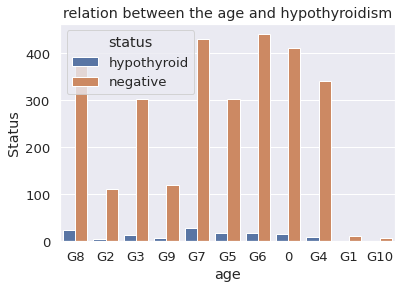

In [279]:

#plot a graph to show the distribution of hypothyroidism across different ages.
age = sns.countplot('age', hue = 'status', data = df1)
age.set(title = "relation between the age and hypothyroidism", ylabel = "Status")

comment:we observe that more female have hypothyroid compared to male
we also see that more female tested negative. thia is expected since more females took the test


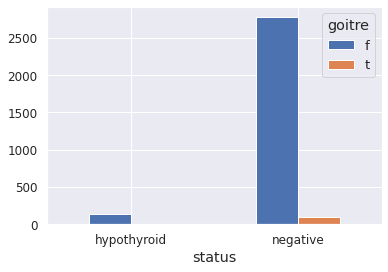

In [280]:
pd.crosstab(df1['status'], df1['goitre']).plot(kind='bar', rot=0, fontsize=12)

# a few patients who tested negative have goitre

 comments:the numerical variables shows moderate to strong positive and negative correlation among each other. some have week negative correlation e.g T4U to FTI and age to TT4. let's explore this further by plotting pair plots below.

**MULTIVARIATE ANALYSIS**

In [281]:
#checking the correlation
corr = df1.corr()
corr

,TSH,T3,TT4,T4U,FTI
TSH,1.000000,-0.184436,-0.321660,0.074867,-0.261213
T3,-0.184436,1.000000,0.590541,0.409381,0.314971
TT4,-0.321660,0.590541,1.000000,0.320452,0.677444
T4U,0.074867,0.409381,0.320452,1.000000,-0.294470
FTI,-0.261213,0.314971,0.677444,-0.294470,1.000000


the relation to itself is 1, has expected. TBG,T4U,TT4,T3 have an inverse relation to age

# MODELLING

**DATA PREPROCESSING**

In [282]:
# since most of the categorical columns are in string format,
# there is need to encode the data to numerical before we begin modeling
# we will use label encoding (.cat.codes)

df1['status'] = df1['status'].cat.codes
df1['sex'] = df1['sex'].cat.codes
df1['on_thyroxine'] = df1['on_thyroxine'].cat.codes
df1['query_on_thyroxine'] = df1['query_on_thyroxine'].cat.codes
df1['on_antithyroid_medication'] = df1['on_antithyroid_medication'].cat.codes
df1['thyroid_surgery'] = df1['thyroid_surgery'].cat.codes
df1['query_hypothyroid'] = df1['query_hypothyroid'].cat.codes
df1['query_hyperthyroid'] = df1['query_hyperthyroid'].cat.codes
df1['pregnant'] = df1['pregnant'].cat.codes

df1['sick'] = df1['sick'].cat.codes
df1['tumor'] = df1['tumor'].cat.codes
df1['lithium'] = df1['lithium'].cat.codes
df1['goitre'] = df1['goitre'].cat.codes
df1['TSH_measured'] = df1['TSH_measured'].cat.codes
df1['T3_measured'] = df1['T3_measured'].cat.codes
df1['TT4_measured'] = df1['TT4_measured'].cat.codes
df1['T4U_measured'] = df1['T4U_measured'].cat.codes
df1['FTI_measured'] = df1['FTI_measured'].cat.codes

In [283]:
# checking for data types. 
df1.dtypes

status                          int8
age                           object
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                          float64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
dtype: object

In [284]:
# converting int8 to int64

df1['status'] = df1['status'].astype('int64')
df1['sex'] = df1['sex'].astype('int64')
df1['on_thyroxine'] = df1['on_thyroxine'].astype('int64')
df1['query_on_thyroxine'] = df1['query_on_thyroxine'].astype('int64')
df1['on_antithyroid_medication'] = df1['on_antithyroid_medication'].astype('int64')
df1['thyroid_surgery'] = df1['thyroid_surgery'].astype('int64')
df1['query_hypothyroid'] = df1['query_hypothyroid'].astype('int64')
df1['query_hyperthyroid'] = df1['query_hyperthyroid'].astype('int64')
df1['pregnant'] = df1['pregnant'].astype('int64')

df1['sick'] = df1['sick'].astype('int64')
df1['tumor'] = df1['tumor'].astype('int64')
df1['lithium'] = df1['lithium'].astype('int64')
df1['goitre'] = df1['goitre'].astype('int64')
df1['TSH_measured'] = df1['TSH_measured'].astype('int64')
df1['T3_measured'] = df1['T3_measured'].astype('int64')
df1['TT4_measured'] = df1['TT4_measured'].astype('int64')
df1['T4U_measured'] = df1['T4U_measured'].astype('int64')
df1['FTI_measured'] = df1['FTI_measured'].astype('int64')
df1.dtypes

status                         int64
age                           object
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
dtype: object

In [285]:
df1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,G8,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,G2,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,G3,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,G3,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,G8,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


**RANDOM FORESTS**

In [286]:
# splitting data into features and label

features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = df1[features].values
y = df1['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =100

